In [1]:
from litemapy import Schematic, Region, BlockState
import numpy as np
import pyvista as pv

In [2]:
litematic = Schematic.load("schematics/tree.litematic")

regions = list(litematic.regions.values())

blocks = np.array(regions[0]._Region__blocks)

In [3]:
region_origin = np.array((regions[0].x, regions[0].y, regions[0].z))

x, y, z = np.indices(blocks.shape)

# Flatten the coordinates to create a list of coordinates (N x 3)
coords = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T
coords += region_origin

# Flatten the 3D array to get the corresponding values
values = blocks.ravel()

coords = coords[values != 0]  # First filter coordinates where value != 0
values = values[values != 0]  # Then filter values where value != 0

# Create the resulting array by stacking the coordinates and values
result_array = np.column_stack([coords, values])

# Swap the 2nd and 3rd columns (y and z)
swapped_coords = coords[:, [0, 2, 1]]

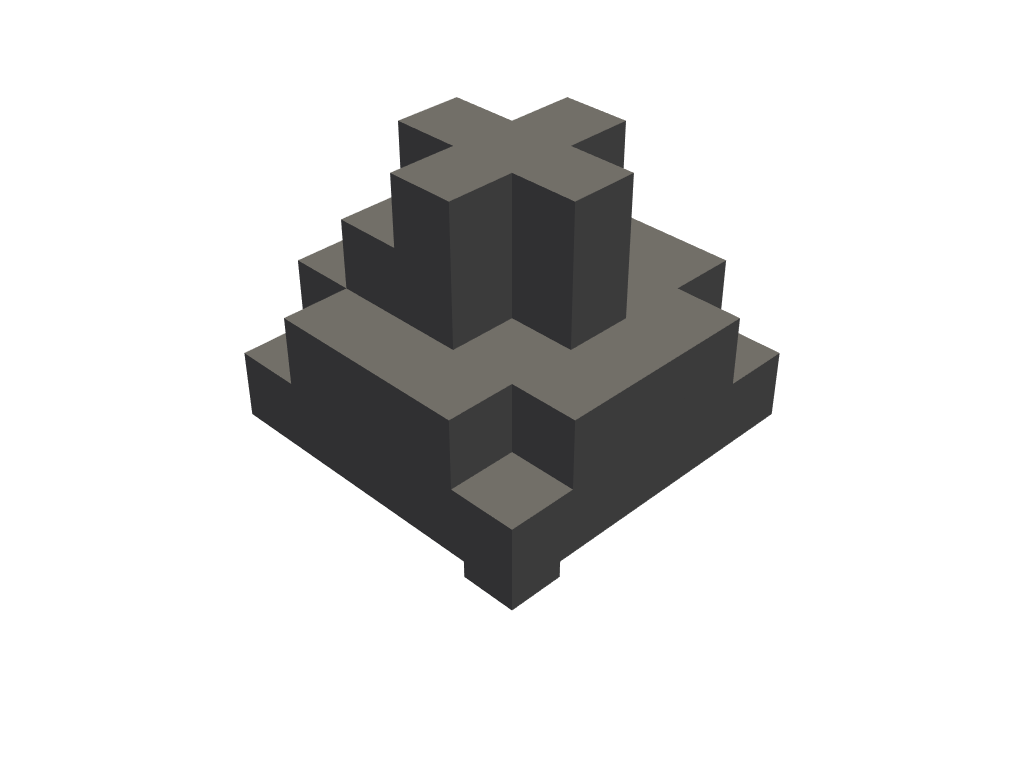

In [4]:
# Create base mesh
voxels = pv.PolyData()
size = 1.0

# Add cubes to mesh
for point in swapped_coords:
    cube = pv.Cube(center=point, x_length=size, y_length=size, z_length=size)
    voxels += cube

# Create static plotter
plotter = pv.Plotter(notebook=True, off_screen=True)
plotter.add_mesh(voxels, color='#808080', opacity=1)

# Show static image
plotter.show(jupyter_backend='static')

In [5]:
import fvdb
import torch

swapped_coords_torch = torch.from_numpy(swapped_coords)

In [6]:
coords_jagged = fvdb.JaggedTensor(swapped_coords_torch.int().cuda())
grid = fvdb.gridbatch_from_ijk(coords_jagged, voxel_sizes=[1, 1, 1], origins=[0.0] * 3)